In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plyv

In [5]:
df = pd.read_csv('../csv/ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [8]:
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard',
               'wireless', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

C:\Users\Damwid\AppData\Local\Temp\ipykernel_21992\3648093109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [15]:
x = np.asanyarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard',
               'wireless']])
y = np.asanyarray(churn_df[['churn']])

X = preprocessing.StandardScaler().fit(x).transform(x)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set: ', X_train.shape, Y_train.shape)
print('Test shape: ', X_test.shape, Y_test.shape)

Train set:  (160, 9) (160, 1)
Test shape:  (40, 9) (40, 1)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)
LR

C:\Users\Damwid\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [24]:
y_hat = LR.predict(X_test)
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [26]:
y_hat_probability = LR.predict_proba(X_test)
y_hat_probability

array([[0.58711718, 0.41288282],
       [0.56650898, 0.43349102],
       [0.5313329 , 0.4686671 ],
       [0.66722528, 0.33277472],
       [0.53481231, 0.46518769],
       [0.59508358, 0.40491642],
       [0.49995014, 0.50004986],
       [0.56532893, 0.43467107],
       [0.39939231, 0.60060769],
       [0.59368426, 0.40631574],
       [0.54844546, 0.45155454],
       [0.58957413, 0.41042587],
       [0.52439771, 0.47560229],
       [0.41344893, 0.58655107],
       [0.68930146, 0.31069854],
       [0.51576247, 0.48423753],
       [0.4969602 , 0.5030398 ],
       [0.46038301, 0.53961699],
       [0.47010467, 0.52989533],
       [0.57170621, 0.42829379],
       [0.50781873, 0.49218127],
       [0.49802608, 0.50197392],
       [0.66938224, 0.33061776],
       [0.49625351, 0.50374649],
       [0.47635919, 0.52364081],
       [0.73040145, 0.26959855],
       [0.45111513, 0.54888487],
       [0.49187403, 0.50812597],
       [0.4927476 , 0.5072524 ],
       [0.73618723, 0.26381277],
       [0.

In [28]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, y_hat)

0.36363636363636365

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plyv.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')
    print(cm)

    plyv.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plyv.title(title)
    plyv.colorbar()
    tick_marks = np.arange(len(classes))
    plyv.xticks(tick_marks, classes, rotation = 45)
    plyv.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plyv.text(j,i,format(cm[i,j], fmt), horizontalalignment = "center", color='white' if cm[i,j]>thresh else 'black')

    plyv.tight_layout()
    plyv.ylabel('True label')
    plyv.xlabel('Predicted label')
print(confusion_matrix(Y_test, y_hat, labels=[0,1]))

[[18  7]
 [ 7  8]]


Confusion matrix without normalization
[[18  7]
 [ 7  8]]


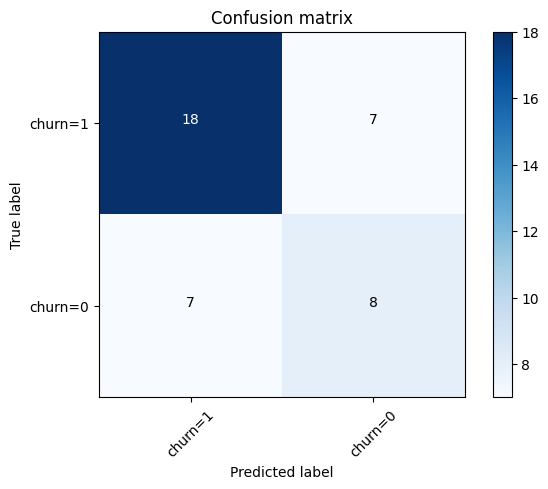

In [30]:
cnf_matrix = confusion_matrix(Y_test, y_hat, labels=[0,1])
np.set_printoptions(precision=2)

plyv.figure()
plot_confusion_matrix(cnf_matrix, classes= ['churn=1', 'churn=0', ],normalize= False,  title='Confusion matrix')

In [31]:
print(classification_report(Y_test, y_hat))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



In [34]:
#log loss( Logarithmic loss) measures the performance of a 
#classifier where the predicted output is a probability 
#value between 0 and 1.
from sklearn.metrics import log_loss
log_loss(Y_test, y_hat_probability)

0.6155809757244557

In [38]:
# Stochastic Average Gradient  SAG

LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,Y_train)
yhat_pred = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(Y_test, yhat_pred))
#Log loss is higher when we use Stochastice average gradient as regularization



LogLoss: : 0.62


C:\Users\Damwid\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:


#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(Y_test,y_hat) #y_target, y_pred

0.35

In [40]:
# MSE L2 loss - Should be close to 0
from sklearn.metrics import mean_squared_error 
mean_squared_error(Y_test,y_hat) #y_target, y_pred

0.35

In [41]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(Y_test,y_hat)*100)

Accuracy :  65.0
